# **Importing packages and data**

---




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('loan.csv')

# Information of  loan.csv file into data and check data size and various coloumns

---



In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
data.shape

(39717, 111)

In [7]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
data.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)



---

# *Data Cleaning*

1. Need to fix rows and columns
2. Need to fix missing values with high percentage 
3. Drop few columns which has mostly NA values or not much Significant.
4. Drop all rows having current status. 
---





---

#Check all Null values in the data set
---



In [9]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64



---


##Drop all the columns which has 100% no values (percentage of missing values)






---



In [10]:
data.dropna(axis=1,how='all',inplace=True)
round((100*data.isnull().sum())/len(data.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli



---
Drop colums have more missing records
1. next_pymnt_d
2. mths_since_last_record
3. mths_since_last_delinq
---



In [11]:
data.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397



---

Check data shape , All null coloumn has been removed.

---



In [12]:
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#Check now rows which contains 100% empty data

In [13]:
round((100*data.isnull().sum(axis=1))/len(data.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [14]:
print('Number of empty Rows',data.isnull().all(axis=1).sum())
print('Number of empty Columns',data.isnull().all(axis=0).sum())


Number of empty Rows 0
Number of empty Columns 0




---

#Dropping all columns has NA value or not required

---



In [15]:
data.drop(data.iloc[:, 49:108], inplace = True, axis = 1) 
data.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type'],
      dtype='object')



---


Removing rows with loan_status as Current 


---



In [16]:
data[data.loan_status != 'Current']
data.shape


(39717, 49)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
data[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             39717 non-null  object
 1   earliest_cr_line    39717 non-null  object
 2   last_pymnt_d        39646 non-null  object
 3   last_credit_pull_d  39715 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [19]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')

In [20]:
# Data Manipulation
print(data.int_rate.head())
data['int_rate'] = data[['int_rate']].applymap(lambda x:str(x).rstrip('%'))
data['int_rate'] = data['int_rate'].astype('float64')
print(data.int_rate.head())

data['revol_util'] = data['revol_util'].str.strip('%').astype('float')
print(data.revol_util.head())

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object
0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64
0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64




---


#Derived Columns


---



In [21]:
# Derived columns

data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['year'] = data['issue_d'].dt.year
data['month'] = data['issue_d'].dt.month

In [22]:
# Caregorize loan amounts into buckets which will help in analysis further in bivariate analysis.
data['loan_amnt_cats'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

In [23]:
# Remove trailing xx in zip code column
print(data['zip_code'].head())
data['zip_code'] = data[['zip_code']].applymap(lambda x:str(x).rstrip('xx'))
print(data['zip_code'].head())

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object
0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object


In [24]:
# Remove trailing months from term column and rename column as term_in_months
print(data['term'].head())
data['term'] = data[['term']].applymap(lambda x:str(x).rstrip('months'))
data['term'] = data['term'].astype('int64')
data.rename(columns={'term':'term_in_months'},inplace=True)
print(data['term_in_months'].head())

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
0    36
1    60
2    36
3    36
4    60
Name: term_in_months, dtype: int64


In [25]:
# Change funded_amnt_inv type to int64
data['funded_amnt_inv'] = data['funded_amnt_inv'].astype("int64")

# Change grade and sub grades type to category
data['grade'] = data['grade'].astype("category")
data['sub_grade'] = data['sub_grade'].astype("category")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  int64         
 5   term_in_months              39717 non-null  int64         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  category      
 9   sub_grade                   39717 non-null  category      
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    



---


#Univariate anaylsis


---



Display data  of loan amount. This will give us an idea about what kind of amount people genrally looking for 

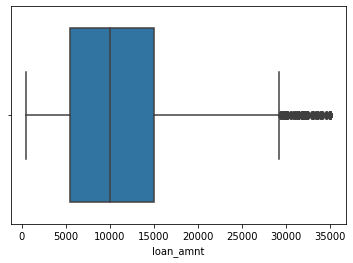

In [28]:
sns.boxplot(data.loan_amnt)
plt.show()

In [29]:
data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64



---


Check the data for people income who are intrested in loan

---



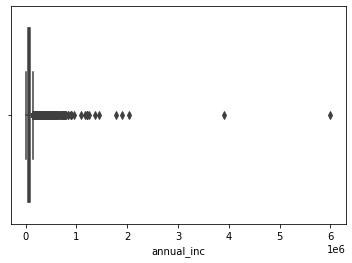

In [30]:
sns.boxplot(data.annual_inc)
plt.show()



---


This data has so many outliner . Using qunatile function to remove all data from 90% above


---



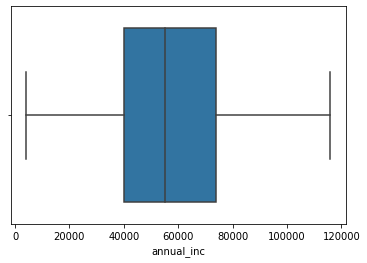

In [31]:
data = data[data["annual_inc"] < data["annual_inc"].quantile(0.90)]
sns.boxplot(data.annual_inc)
plt.show()



---

Check how much payment we have as Payments received for total amount funded

---



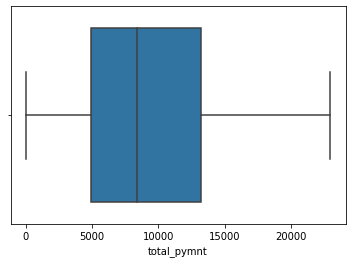

In [32]:
data = data[data["total_pymnt"] < data["total_pymnt"].quantile(0.90)]
sns.boxplot(data.total_pymnt)
plt.show()




---


Check the data about how many people are defaulters


---



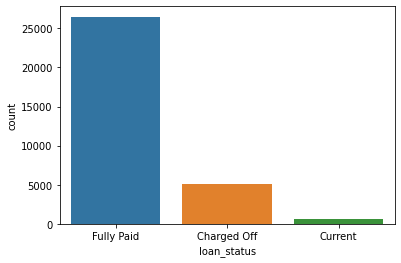

In [33]:
sns.countplot(x="loan_status",data = data)
plt.show()

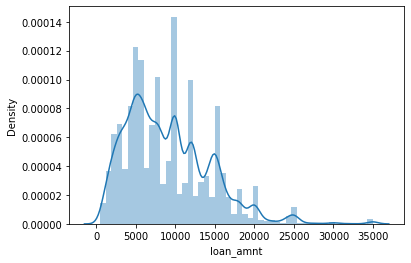

In [34]:
sns.distplot(data['loan_amnt'])

In [35]:
print("%.2f" % (data.loc[data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(data)))

15.73


**Observation: Appriximatily 16% of the loans are Charged Off**

In [52]:
data.groupby('loan_status').loan_amnt.count().sort_values(ascending=False)

loan_status
Fully Paid     26476
Charged Off     5061
Current          629
Name: loan_amnt, dtype: int64



---


Check the purpose of Loan which has many defaulters


---



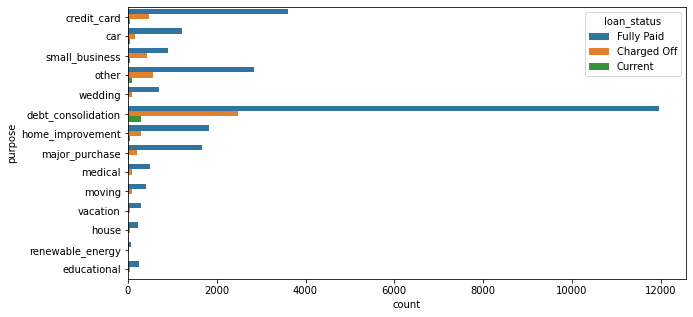

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(y="purpose",data=data,hue='loan_status')
plt.show()

**Observation: People are taking more loan to pay other debt**



---
Check for the home ownership vs people has defaulters
---



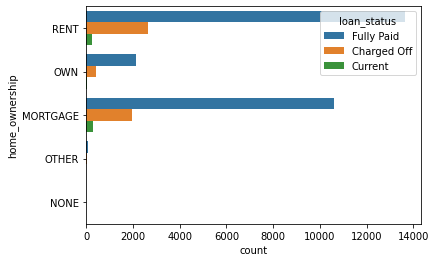

In [38]:
sns.countplot(y="home_ownership",data=data,hue='loan_status')
plt.show()

---
Check for the state where we have most defaulters

---



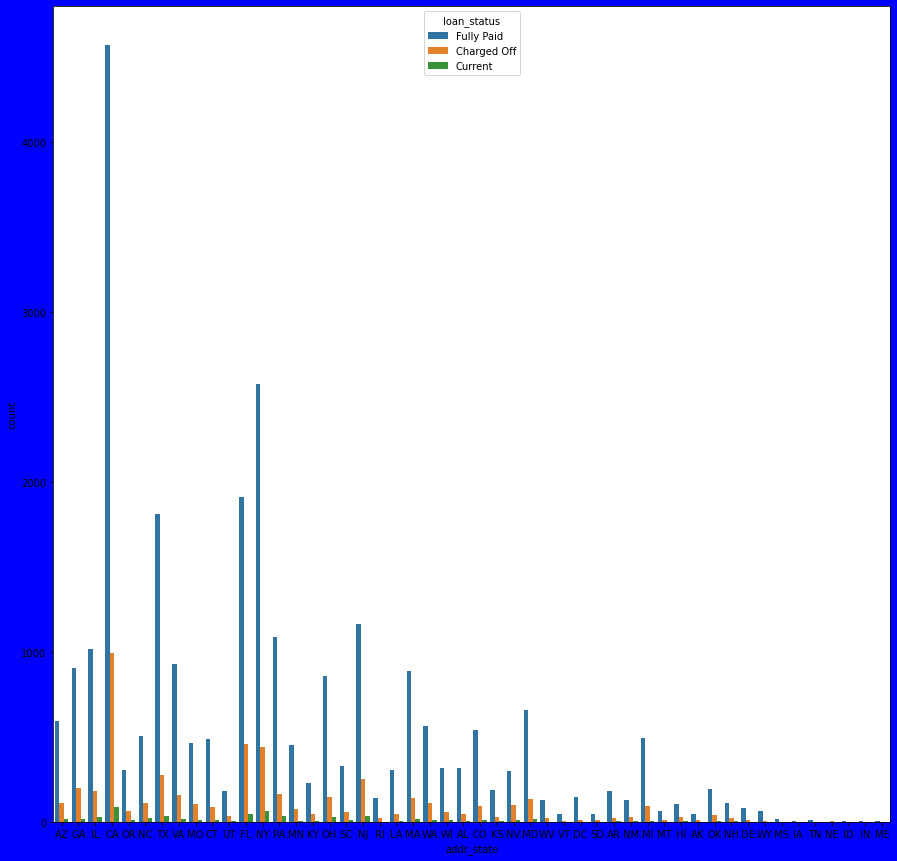

In [39]:
plt.figure(figsize=(15,15),facecolor='b')
sns.countplot(x="addr_state",data=data,hue='loan_status')
plt.show()



---


#Bivariate analysis


---



In [40]:
# function to add value labels
def addLabels(ax, d=None):
  plt.margins(0.2, 0.2)
  rects = ax.patches
  i = 0
  locs, labels = plt.xticks() 
  counts = {}
  if not d is None:
      for key, value in d.items():
          counts[str(key)] = value

  for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = 5
        va = 'bottom'

        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        i = i+1

        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',
            va = va)                
                                        


In [41]:
# Remove curent loan type from data set since we don't have any impact on our use case
df_loan = data[data['loan_status'].isin(['Fully Paid','Charged Off'])]

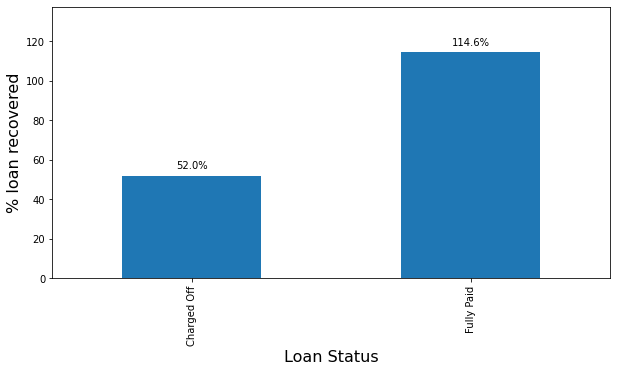

In [57]:
plt.figure(figsize=(10, 5))
axis = (df_loan.groupby('loan_status').total_pymnt.sum() * 100 / df_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
axis.set_xlabel('Loan Status', fontsize=16)
axis.set_ylabel('% loan recovered', fontsize=16)
addLabels(axis)

**Observation: 52 % Loan amount is recovered from defaulters**

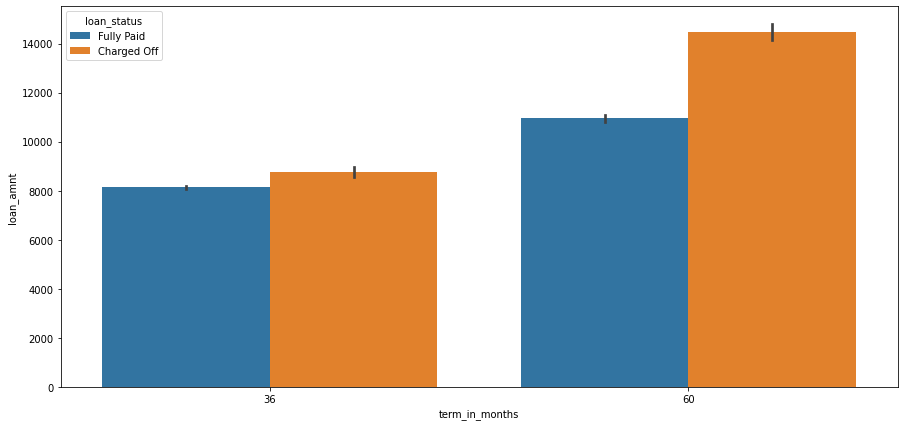

In [43]:
plt.figure(figsize=(15,7))
sns.barplot(x='term_in_months', y='loan_amnt', hue="loan_status", data = df_loan)
plt.show()

**Observation: 
As per the analysis, Higher the term and loan amount, higher Charged off's**

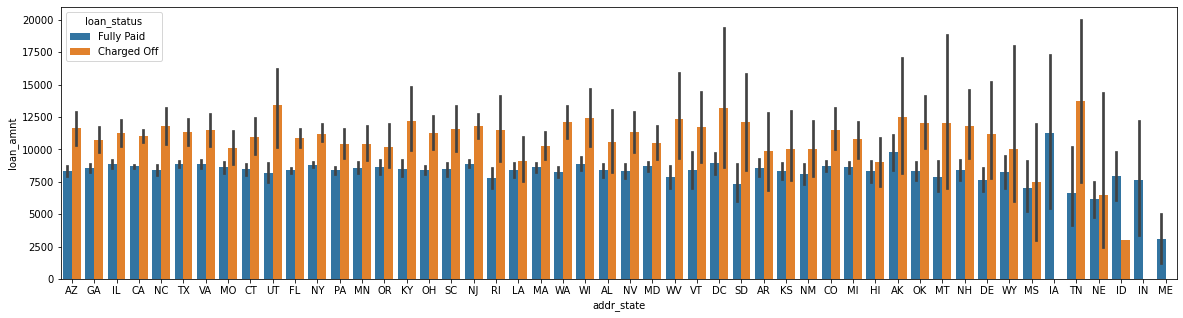

In [44]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data = df_loan, estimator=np.mean)
plt.show()

**Observation : State Ak has Higher loan amount that is charged off**



---


#Bivariate analysis with Year and Intrest Rate


---



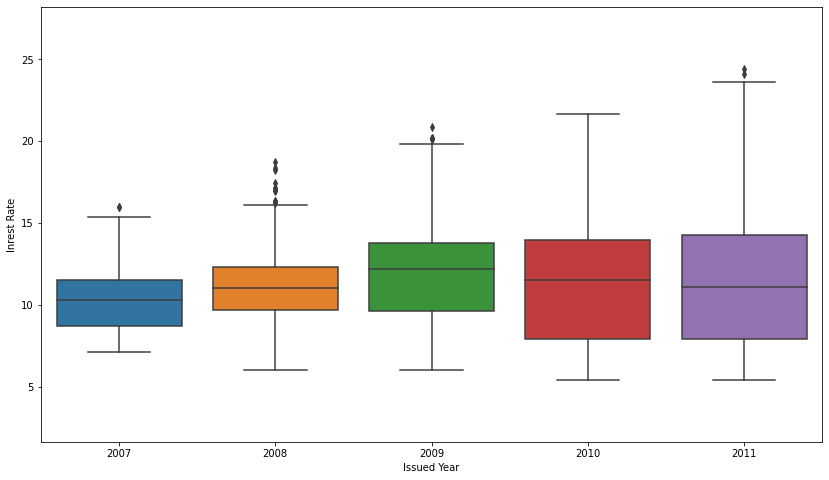

In [56]:
plt.figure(figsize=(14,8))
axis = sns.boxplot(y='int_rate', x='year', data = df_loan)
axis.set_xlabel('Issued Year')
axis.set_ylabel('Inrest Rate')
addLabels(axis)
plt.show()

**Observation: Intrest rate is increased with each year**

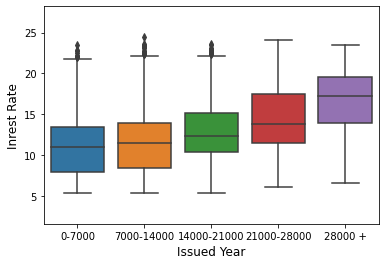

In [59]:
axis = sns.boxplot(y='int_rate', x='loan_amnt_cats', data = df_loan)
axis.set_xlabel('Issued Year', fontsize=12)
axis.set_ylabel('Inrest Rate', fontsize=12)
addLabels(axis)
plt.show()

**Observation: Intrest rate is also increased when Loan amount increase**

In [62]:
loan_amnt_corr = df_loan.corr()
loan_amnt_corr['loan_amnt']

id                            0.064174
member_id                     0.063794
loan_amnt                     1.000000
funded_amnt                   0.973090
funded_amnt_inv               0.908235
term_in_months                0.293144
int_rate                      0.188432
installment                   0.915546
annual_inc                    0.312643
dti                           0.089929
delinq_2yrs                  -0.039801
inq_last_6mths                0.010613
open_acc                      0.157057
pub_rec                      -0.029173
revol_bal                     0.258542
revol_util                    0.054976
total_acc                     0.205611
out_prncp                          NaN
out_prncp_inv                      NaN
total_pymnt                   0.773193
total_pymnt_inv               0.721305
total_rec_prncp               0.698800
total_rec_int                 0.650298
total_rec_late_fee            0.036464
recoveries                    0.190767
collection_recovery_fee  

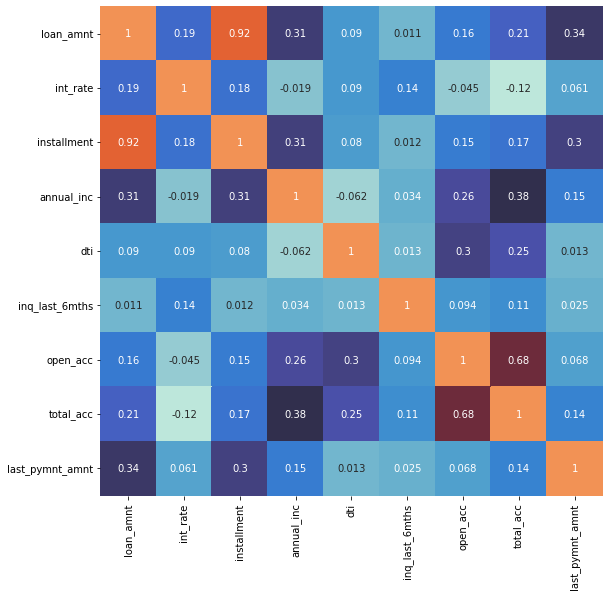

In [67]:
plt.figure(figsize=(9,9))
corr_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti',
       'inq_last_6mths', 'open_acc', 'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
corr = df_loan[corr_var].corr()
sns.heatmap(corr, annot=True, center=0.5 , cbar=False)
plt.show()


**Observation: 

---


1.  Loan amount and installment has high correlation

2.  Annual Income and int_rate has negative correlation **


---



